# SCRAPING WIKIPEDIA FOR MOVIES DATA

In [2]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import re
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Get infobox for one movie

In [4]:
r = requests.get("https://en.wikipedia.org/wiki/Iron_Man_3")

# Convert to a beautiful soup object
soup = bs(r.content)

# Print out the HTML
contents = soup.prettify()
print(contents)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Iron Man 3 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fdf8f3be-a6ee-4314-8862-3d3fa70b8ed4","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Iron_Man_3","wgTitle":"Iron Man 3","wgCurRevisionId":1015282092,"wgRevisionId":1015282092,"wgArticleId":22144990,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: location","CS1 French-language sources (fr)","Articles with short description","Short description matches Wikidata","Good articles","Use American 

In [5]:
info_box = soup.find(class_= 'infobox vevent')
info_rows = info_box.find_all("tr")
for row in info_rows:
    print(row.prettify())

<tr>
 <th class="infobox-above summary" colspan="2" style="font-size:110%;font-style:italic;">
  Iron Man 3
 </th>
</tr>

<tr>
 <td class="infobox-image" colspan="2">
  <a class="image" href="/wiki/File:Iron_Man_3_poster.jpg" title="Tony, as Iron Man in his battle damaged suit sitting with water around him, while his house behind is destroyed. Stark's Iron Legion is flying, while the Marvel logo with the film's title, credits and release date are below.">
   <img alt="Tony, as Iron Man in his battle damaged suit sitting with water around him, while his house behind is destroyed. Stark's Iron Legion is flying, while the Marvel logo with the film's title, credits and release date are below." class="thumbborder" data-file-height="326" data-file-width="220" decoding="async" height="326" src="//upload.wikimedia.org/wikipedia/en/1/19/Iron_Man_3_poster.jpg" width="220"/>
  </a>
  <div class="infobox-caption" style="font-size:95%;padding:0.35em 0.35em 0.25em;line-height:1.25em;">
   Theatrical

In [6]:
def get_content_value(row_data):
    if row_data.find("li"):
        return [li.get_text(" ", strip=True).replace("\xa0", " ") for li in row_data.find_all("li")]
    else:
        return row_data.get_text(" ", strip=True).replace('\xa0x', " ")

movie_info = {}
    
    
for index, row in enumerate(info_rows):
    if index == 0:
        movie_info['title'] = row.find("th").get_text(" ",strip=True)
    elif index == 1:
        continue
    else:
        content_key = row.find('th').get_text(" ", strip=True)
        content_value = get_content_value(row.find('td'))
        movie_info[content_key] = content_value
        
movie_info    

{'title': 'Iron Man 3',
 'Directed by': 'Shane Black',
 'Produced by': 'Kevin Feige',
 'Screenplay by': ['Shane Black', 'Drew Pearce'],
 'Based on': ['Stan Lee', 'Don Heck', 'Larry Lieber', 'Jack Kirby'],
 'Starring': ['Robert Downey Jr.',
  'Gwyneth Paltrow',
  'Don Cheadle',
  'Guy Pearce',
  'Rebecca Hall',
  'Stéphanie Szostak',
  'James Badge Dale',
  'Jon Favreau',
  'Ben Kingsley'],
 'Music by': 'Brian Tyler',
 'Cinematography': 'John Toll',
 'Edited by': ['Jeffrey Ford', 'Peter S. Elliot'],
 'Production company': 'Marvel Studios',
 'Distributed by': 'Walt Disney Studios Motion Pictures [N 1]',
 'Release date': ['April 14, 2013 ( 2013-04-14 ) ( Grand Rex )',
  'May 3, 2013 ( 2013-05-03 ) (United States)'],
 'Running time': '131 minutes [1]',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$200 million [2]',
 'Box office': '$1.215 billion [3]'}

# Get info box for all movies

In [7]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_films")

# Convert to a beautiful soup object
soup = bs(r.content)

# Print out the HTML
contents = soup.prettify()
print(contents)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Marvel Cinematic Universe films - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"8189e5ab-2ac4-4a4a-a648-36d888f68315","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Marvel_Cinematic_Universe_films","wgTitle":"List of Marvel Cinematic Universe films","wgCurRevisionId":1015988119,"wgRevisionId":1015988119,"wgArticleId":42163310,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Swedish-language sources (sv)","Articles with short description","

In [8]:
movies = soup.select('.wikitable.sortable i')
movies = movies[0:23]
movies

[<i><a href="/wiki/Iron_Man_(2008_film)#Box_office" title="Iron Man (2008 film)">Iron Man</a></i>,
 <i><a href="/wiki/The_Incredible_Hulk_(film)#Box_office" title="The Incredible Hulk (film)">The Incredible Hulk</a></i>,
 <i><a href="/wiki/Iron_Man_2#Box_office" title="Iron Man 2">Iron Man 2</a></i>,
 <i><a href="/wiki/Thor_(film)#Box_office" title="Thor (film)">Thor</a></i>,
 <i><a href="/wiki/Captain_America:_The_First_Avenger#Box_office" title="Captain America: The First Avenger">Captain America: The First Avenger</a></i>,
 <i><a href="/wiki/The_Avengers_(2012_film)#Box_office" title="The Avengers (2012 film)">Marvel's The Avengers</a></i>,
 <i><a href="/wiki/Iron_Man_3#Box_office" title="Iron Man 3">Iron Man 3</a></i>,
 <i><a href="/wiki/Thor:_The_Dark_World#Box_office" title="Thor: The Dark World">Thor: The Dark World</a></i>,
 <i><a href="/wiki/Captain_America:_The_Winter_Soldier#Box_office" title="Captain America: The Winter Soldier">Captain America: The Winter Soldier</a></i>,


In [9]:
def get_content_value(row_data):
    if row_data.find("li"):
        return [li.get_text(" ", strip=True).replace("\xa0", " ") for li in row_data.find_all("li")]
    elif row_data.find("br"):
        return [text for text in row_data.stripped_strings]
    else:
        return row_data.get_text(" ", strip=True).replace("\xa0", " ")

def clean_tags(soup):
    for tag in soup.find_all(["sup", "span"]):
        tag.decompose()
        
def get_info_box(url):

    r = requests.get(url)
    soup = bs(r.content)
    info_box = soup.find(class_="infobox vevent")
    info_rows = info_box.find_all("tr")
    
    clean_tags(soup)

    movie_info = {}
    for index, row in enumerate(info_rows):
        if index == 0:
            movie_info['title'] = row.find("th").get_text(" ", strip=True)
        else:
            header = row.find('th')
            if header:
                content_key = row.find("th").get_text(" ", strip=True)
                content_value = get_content_value(row.find("td"))
                movie_info[content_key] = content_value
            
    return movie_info

In [10]:
get_info_box("https://en.wikipedia.org/wiki/Iron_Man_(2008_film)")

{'title': 'Iron Man',
 'Directed by': 'Jon Favreau',
 'Produced by': ['Avi Arad', 'Kevin Feige'],
 'Screenplay by': ['Mark Fergus Hawk Ostby', 'Art Marcum Matt Holloway'],
 'Based on': ['Stan Lee', 'Larry Lieber', 'Don Heck', 'Jack Kirby'],
 'Starring': ['Robert Downey Jr.',
  'Terrence Howard',
  'Jeff Bridges',
  'Shaun Toub',
  'Gwyneth Paltrow'],
 'Music by': 'Ramin Djawadi',
 'Cinematography': 'Matthew Libatique',
 'Edited by': 'Dan Lebental',
 'Production company': 'Marvel Studios',
 'Distributed by': 'Paramount Pictures',
 'Release date': ['April 14, 2008 (Sydney)', 'May 2, 2008 (United States)'],
 'Running time': '126 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$140 million',
 'Box office': '$585.3 million'}

In [35]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_films")
soup = bs(r.content)
movies = soup.select(".wikitable.sortable i a")

base_link = "https://en.wikipedia.org/"

movie_info_list = []
for index, movie in enumerate(movies):
    if index % 10 == 0:
        print(index)
    try:
        half_link = movie['href']
        full_link = base_link + half_link
        title = movie['title']
        
        movie_info_list.append(get_info_box(full_link))
        
    except Exception as e:
        print(movie.get_text())
        print(e)

0
10
20
30
40


In [14]:
movie_info_list = movie_info_list[0:23]
len(movie_info_list)

23

In [13]:
movie_info_list[3]

{'title': 'Thor',
 'Directed by': 'Kenneth Branagh',
 'Produced by': 'Kevin Feige',
 'Screenplay by': ['Ashley Edward Miller', 'Zack Stentz', 'Don Payne'],
 'Story by': ['J. Michael Straczynski', 'Mark Protosevich'],
 'Based on': ['Stan Lee', 'Larry Lieber', 'Jack Kirby'],
 'Starring': ['Chris Hemsworth',
  'Natalie Portman',
  'Tom Hiddleston',
  'Stellan Skarsgård',
  'Colm Feore',
  'Ray Stevenson',
  'Idris Elba',
  'Kat Dennings',
  'Rene Russo',
  'Anthony Hopkins'],
 'Music by': 'Patrick Doyle',
 'Cinematography': 'Haris Zambarloukos',
 'Edited by': 'Paul Rubell',
 'Production company': 'Marvel Studios',
 'Distributed by': 'Paramount Pictures',
 'Release date': ['April 17, 2011 ( Sydney )', 'May 6, 2011 (United States)'],
 'Running time': '114 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$150 million',
 'Box office': '$449.3 million'}

In [15]:
def save_data(title, data):
    with open (title, 'w', encoding = 'utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent = 2)

In [16]:
def load_data(title):
    with open (title, encoding = 'utf-8') as f:
        return json.load(f)  

In [17]:
save_data('mcu_data.json', movie_info_list)

# Cleaning our data


In [18]:
movie_info_list = load_data("mcu_data.json")

In [19]:
print([movie.get('Running time', 'N/A') for movie in movie_info_list])

['126 minutes', '112 minutes', '124 minutes', '114 minutes', '124 minutes', '143 minutes', '131 minutes', '112 minutes', '136 minutes', '122 minutes', '141 minutes', '117 minutes', '147 minutes', '115 minutes', '137 minutes', '133 minutes', '130 minutes', '134 minutes', '149 minutes', '118 minutes', '124 minutes', '181 minutes', '129 minutes']


In [20]:
def minutes_to_integer(running_time):
    if running_time == "N/A":
        return None
    
    if isinstance(running_time, list):
        return int(running_time[0].split(" ")[0])
    else: # is a string
        return int(running_time.split(" ")[0])

for movie in movie_info_list:
    movie['Running time (int)'] = minutes_to_integer(movie.get('Running time', "N/A"))

In [21]:
print([movie.get('Running time (int)', 'N/A') for movie in movie_info_list])

[126, 112, 124, 114, 124, 143, 131, 112, 136, 122, 141, 117, 147, 115, 137, 133, 130, 134, 149, 118, 124, 181, 129]


In [22]:
print([movie.get('Budget', 'N/A') for movie in movie_info_list])

['$140 million', '$137.5-150 million', '$170–200 million', '$150 million', '$140–216.7 million', '$220 million', '$200 million', '$150-170 million', '$170–177 million', ['$232.3 million (gross)', '$195.9 million (net)'], ['$444–495.2 million (gross)', '$365 million (net)'], '$130–169.3 million', '$250 million', '$165–236.6 million', '$200 million', '$175 million', '$180 million', '$200 million', '$325–400 million', '$130–195 million', '$152–175 million', '$356 million', '$160 million']


In [23]:
amounts = r"thousand|million|billion"
number = r"\d+(,\d{3})*\.*\d*"

word_re = rf"\${number}(-|\sto\s|-)?({number})?\s({amounts})"
value_re = rf"\${number}"

def word_to_value(word):
    value_dict = {"thousand": 1000, "million": 1000000, "billion": 1000000000, "crore": 10000000}
    return value_dict[word]

def parse_word_syntax(string):
    value_string = re.search(number, string).group()
    value = float(value_string.replace(",", ""))
    word = re.search(amounts, string, flags=re.I).group().lower()
    word_value = word_to_value(word)
    return value*word_value

def parse_value_syntax(string):
    value_string = re.search(number, string).group()
    value = float(value_string.replace(",", ""))
    return value

def money_conversion(money):
    if money == "N/A":
        return None

    if isinstance(money, list):
        money = money[0]
        
    word_syntax = re.search(word_re, money, flags=re.I)
    value_syntax = re.search(value_re, money)

    if word_syntax:
        return parse_word_syntax(word_syntax.group())

    elif value_syntax:
        return parse_value_syntax(value_syntax.group())

    else:
        return None

In [24]:
for movie in movie_info_list:
    movie['Budget (float)'] = money_conversion(movie.get('Budget', "N/A"))
    movie['Box office (float)'] = money_conversion(movie.get('Box office', "N/A"))

In [25]:
print([movie.get('Budget (float)', 'N/A') for movie in movie_info_list])
print([movie.get('Box office (float)', 'N/A') for movie in movie_info_list])

[140000000.0, 137500000.0, 170.0, 150000000.0, 140.0, 220000000.0, 200000000.0, 150000000.0, 170.0, 232300000.0, 444.0, 130.0, 250000000.0, 165.0, 200000000.0, 175000000.0, 180000000.0, 200000000.0, 325.0, 130.0, 152.0, 356000000.0, 160000000.0]
[585300000.0, 264800000.0, 623900000.0, 449300000.0, 370600000.0, 1519000000.0, 1215000000.0, 644800000.0, 714400000.0, 772800000.0, 1403000000.0, 519299999.99999994, 1153000000.0, 677700000.0, 863800000.0, 880200000.0, 854000000.0, 1348000000.0, 2048000000.0, 622700000.0, 1128000000.0, 2798000000.0, 1132000000.0]


In [26]:
print([movie.get('Release date', 'N/A') for movie in movie_info_list])

[['April 14, 2008 (Sydney)', 'May 2, 2008 (United States)'], ['June 8, 2008 ( Gibson Amphitheatre )', 'June 13, 2008 (United States)'], ['April 26, 2010 ( El Capitan Theatre )', 'May 7, 2010 (United States)'], ['April 17, 2011 ( Sydney )', 'May 6, 2011 (United States)'], ['July 19, 2011 ( El Capitan Theatre )', 'July 22, 2011 (United States)'], ['April 11, 2012 ( El Capitan Theatre )', 'May 4, 2012 (United States)'], ['April 14, 2013 ( Grand Rex )', 'May 3, 2013 (United States)'], ['October 22, 2013 ( Leicester Square )', 'November 8, 2013 (United States)'], ['March 13, 2014 ( El Capitan Theatre )', 'April 4, 2014 (United States)'], ['July 21, 2014 ( Dolby Theatre )', 'August 1, 2014 (United States)'], ['April 13, 2015 ( Dolby Theatre )', 'May 1, 2015 (United States)'], ['June 29, 2015 ( Dolby Theatre )', 'July 17, 2015 (United States)'], ['April 12, 2016 ( Dolby Theatre )', 'May 6, 2016 (United States)'], ['October 13, 2016 ( Hong Kong )', 'November 4, 2016 (United States)'], ['April 

In [27]:
dates = [movie.get('Release date', 'N/A') for movie in movie_info_list]

def clean_date(date):
    return date.split("(")[0].strip()

def date_conversion(date):
    if isinstance(date, list):
        date = date[0]

        
    date_str = clean_date(date)

    fmts = ["%B %d, %Y", "%d %B %Y"]
    for fmt in fmts:
        try:
            return datetime.strptime(date_str, fmt)
        except:
            pass
    return None

In [28]:
for movie in movie_info_list:
    movie['Release date (datetime)'] = date_conversion(movie.get('Release date', 'N/A'))

In [29]:
movie_info_list[22]

{'title': 'Spider-Man: Far From Home',
 'Directed by': 'Jon Watts',
 'Produced by': ['Kevin Feige', 'Amy Pascal'],
 'Written by': ['Chris McKenna', 'Erik Sommers'],
 'Based on': ['Stan Lee', 'Steve Ditko'],
 'Starring': ['Tom Holland',
  'Samuel L. Jackson',
  'Zendaya',
  'Cobie Smulders',
  'Jon Favreau',
  'J. B. Smoove',
  'Jacob Batalon',
  'Martin Starr',
  'Marisa Tomei',
  'Jake Gyllenhaal'],
 'Music by': 'Michael Giacchino',
 'Cinematography': 'Matthew J. Lloyd',
 'Edited by': ['Dan Lebental', 'Leigh Folsom Boyd'],
 'Production companies': ['Columbia Pictures',
  'Marvel Studios',
  'Pascal Pictures'],
 'Distributed by': 'Sony Pictures Releasing',
 'Release date': ['June 26, 2019 ( TCL Chinese Theatre )',
  'July 2, 2019 (United States)'],
 'Running time': '129 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$160 million',
 'Box office': '$1.132 billion',
 'Running time (int)': 129,
 'Budget (float)': 160000000.0,
 'Box office (float)': 1132000000.0,

In [30]:
df = pd.DataFrame.from_dict(movie_info_list)

In [31]:
df.head()

,title,Directed by,Produced by,Screenplay by,Based on,Starring,Music by,Cinematography,Edited by,Production company,...,Language,Budget,Box office,Running time (int),Budget (float),Box office (float),Release date (datetime),Written by,Production companies,Story by
0,Iron Man,Jon Favreau,"[Avi Arad, Kevin Feige]","[Mark Fergus Hawk Ostby, Art Marcum Matt Hollo...","[Stan Lee, Larry Lieber, Don Heck, Jack Kirby]","[Robert Downey Jr., Terrence Howard, Jeff Brid...",Ramin Djawadi,Matthew Libatique,Dan Lebental,Marvel Studios,...,English,$140 million,$585.3 million,126,140000000.0,585300000.0,2008-04-14,NaN,NaN,NaN
1,The Incredible Hulk,Louis Leterrier,"[Avi Arad, Gale Anne Hurd, Kevin Feige]",NaN,"[Stan Lee, Jack Kirby]","[Edward Norton, Liv Tyler, Tim Roth, Tim Blake...",Craig Armstrong,Peter Menzies Jr.,"[John Wright, Rick Shaine, Vincent Tabaillon]",NaN,...,English,$137.5-150 million,$264.8 million,112,137500000.0,264800000.0,2008-06-08,Zak Penn,"[Marvel Studios, Valhalla Motion Pictures]",NaN
2,Iron Man 2,Jon Favreau,Kevin Feige,Justin Theroux,"[Stan Lee, Larry Lieber, Don Heck, Jack Kirby]","[Robert Downey Jr., Gwyneth Paltrow, Don Chead...",John Debney,Matthew Libatique,"[Dan Lebental, Richard Pearson]",Marvel Studios,...,English,$170–200 million,$623.9 million,124,170.0,623900000.0,2010-04-26,NaN,NaN,NaN
3,Thor,Kenneth Branagh,Kevin Feige,"[Ashley Edward Miller, Zack Stentz, Don Payne]","[Stan Lee, Larry Lieber, Jack Kirby]","[Chris Hemsworth, Natalie Portman, Tom Hiddles...",Patrick Doyle,Haris Zambarloukos,Paul Rubell,Marvel Studios,...,English,$150 million,$449.3 million,114,150000000.0,449300000.0,2011-04-17,NaN,NaN,"[J. Michael Straczynski, Mark Protosevich]"
4,Captain America: The First Avenger,Joe Johnston,Kevin Feige,"[Christopher Markus, Stephen McFeely]","[Joe Simon, Jack Kirby]","[Chris Evans, Tommy Lee Jones, Hugo Weaving, H...",Alan Silvestri,Shelly Johnson,"[Jeffrey Ford, Robert Dalva]",Marvel Studios,...,English,$140–216.7 million,$370.6 million,124,140.0,370600000.0,2011-07-19,NaN,NaN,NaN


<AxesSubplot:xlabel='Release date (datetime)', ylabel='Budget (float)'>

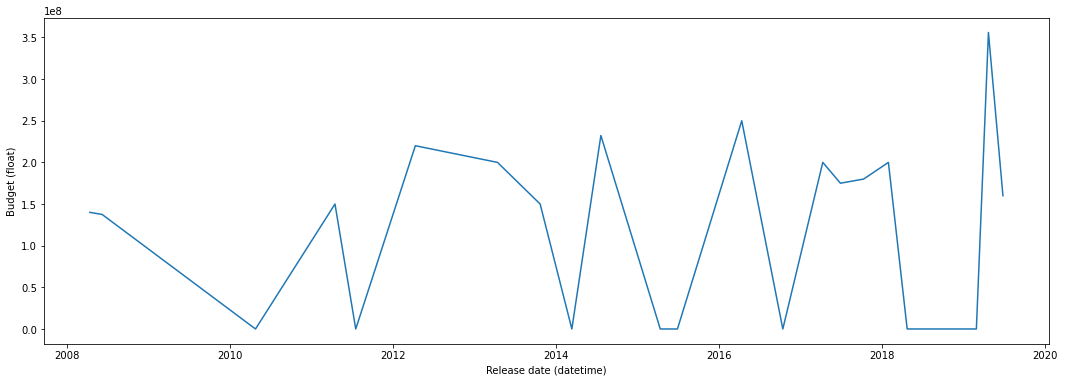

In [32]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x= 'Release date (datetime)', y = 'Budget (float)')

As we can see from the graph above the budget of the movies have been pretty fluctuating over the years (x axis being years and y axis being budget in millions and billions). This shows that maybe due to the fact that they produce small solo movies with lower budget and ocassionaly release a big blockbuster crossover event thus the budget spikes

<AxesSubplot:xlabel='Release date (datetime)', ylabel='Box office (float)'>

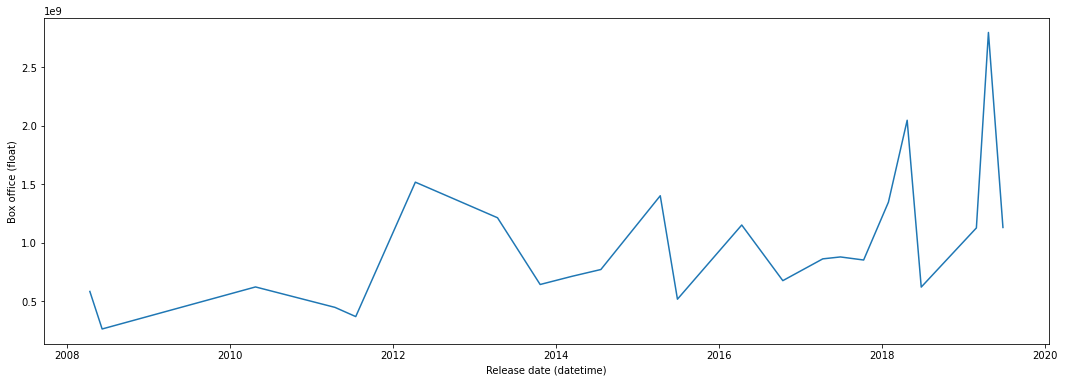

In [33]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x= 'Release date (datetime)', y = 'Box office (float)')

As we can see from the graph above that over the years the box office numbers increased gradually (x axis being years and y axis being dollars in millions/billions) and have multiple spikes when they released a big blockbuster like the avengers (2012 - 1st anvengers, 2015 - 2nd avengers, 2018 - 3rd avengers and 2019 - 4th avengers). It could be said that over the years this movie franchise has gained popularity so more people come to watch these movies and thats why box office numbers are so high 

<AxesSubplot:xlabel='Release date (datetime)', ylabel='Running time (int)'>

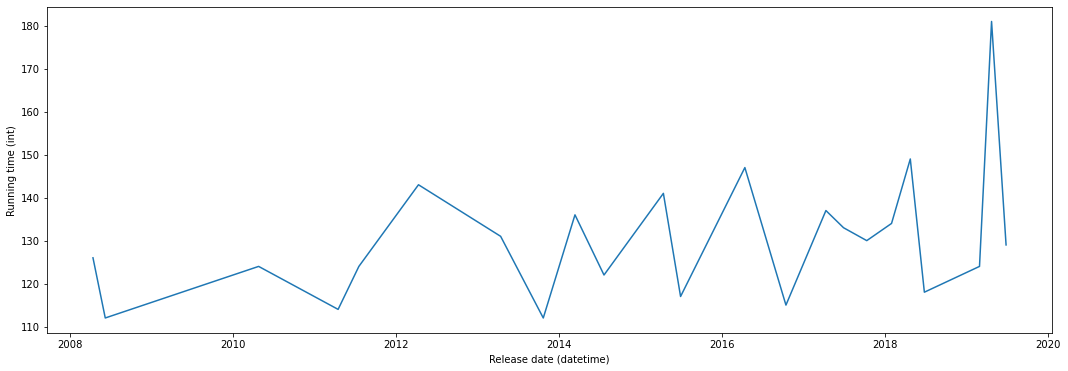

In [34]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x= 'Release date (datetime)', y = 'Running time (int)')

As we can see in the graph above that over the years Marvel increased the run time of each of their movies gradually as fans demanaded more set-pieces, action and plot points to fit all the new characters
